<a href="https://colab.research.google.com/github/soohyoen/artificial-intelligence/blob/main/ml_13_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 29.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=30097ad0420e35682c4bb1afed2ffa14b63472aeb869bda9becc47bb1a7117de
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

## 학습목표

머신러닝 모델의 성능을 평가하고, 올바른 매개변수를 선택하는 방법을 이해한다.

1. 모델의 일반화 성능을 평가(측정)하는 법

- 교차 검증 : 안정적인 일반화 성능 측정 방법

- 평가 지표
 - 이진/다중 분류의 평가 지표
 > 정확도, 오차 행렬, 분류 리포트,  <br>
 > 정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

 - 회귀의 평가 지표
 > \\( R^2 \\) , 평균제곱오차, 평균절대값오차


2. 매개변수를 튜닝하여 일반화 성능을 개선

- 그리드 서치(grid search) : 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도
- 매개변수를 조정하기 전에 그 매개변수의 의미를 이해하는 것이 중요

## 학습/테스트 데이터 세트 분리

- 테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측하면 예측 정확도 100% 가 됨
= 학습을 위한 데이터의 양을 일정 수준 이상으로 보장하는 것이 중요
- 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해 보는 것도 매우 중요

[train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
```
train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
```
Parameter

- arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25) <br>
(전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정)

- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지) <br>
(test_size 를 통상적으로 사용하기 때문에 잘 사용되지 않음)

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력) <br>
(호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. 지정하지 않으면 호출 시 무작위로 데이터를 분리하므로 수행할 때마다 다른 학습/테스트용 데이터를 생성)

- shuffle : 셔플여부설정 (default = True) <br>
(데이터를 분리하기 전에 미리 섞을지를 결정. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용)

- stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

Return

- X_train, X_test, y_train, y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.
- X_train, X_test : arrays에 레이블(y) 없이 데이터만 넣었을 경우의 반환


# 교차 검증 (Cross Validation)

- 교차검증 : 일반화 성능 향상을 위해 훈련 세트와 테스트 세트로 한 번 나누는 것보다 더 안정적이고 뛰어난 평가 방법
 - 데이터 편중을 막기 위함
 - 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

- k-겹 교차검증 : 데이터를 폴드(fold)라는 거의 비슷한 크기의 부분집합을 k개로 분리하고 각 부분집합의 정확도를 측정

- scikit-learn에서 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현


[cross_val_score()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

```
cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)

Return
- 교차 검증 결과 정확도 점수의 배열

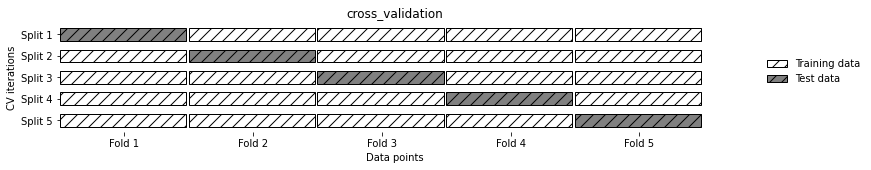

In [ ]:
import mglearn
# 5-겹 교차 검증에서의 데이터 분할
mglearn.plots.plot_cross_validation()

In [ ]:
# 교차 검증을 간편하게
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state=0)

scores = cross_val_score(model_lr,X,y)
print(scores)

scores = cross_val_score(model_dt,X,y)
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]
[0.96666667 0.96666667 0.9        0.96666667 1.        ]


- cross_val_score의 기본값은 5-겹 교차 검증이므로 정확도 값이 5개가 반환 <br>
(scikit-learn 0.22 부터 기본값은 5-겹, 기존 기본값 3-겹)

- 폴드의 수는 cv 매개변수를 사용해서 바꿀 수 있음



In [ ]:
scores = cross_val_score(model_lr, X, y, cv=3)
print( scores )

[0.98 0.96 0.98]


- 보통 교차 검증의 정확도를 간단하게 나타내려면 평균을 사용

In [ ]:
scores = cross_val_score(model_lr, X, y, cv=3)
print( scores, scores.mean() )

scores = cross_val_score(model_dt, X, y)
print( scores, scores.mean() )

[0.98 0.96 0.98] 0.9733333333333333
[0.96666667 0.96666667 0.9        0.96666667 1.        ] 0.9600000000000002


여러 개의 평가 지표 반환 교차 검증 함수

[cross_validate()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

```
cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
```
Parameter

- estimator : 평가하려는 모델
- X : 훈련 데이터
- y : 타깃 레이블
- cv : 교차 검증 분할 수(k)
- return_train_score : 훈련 점수 포함 여부

Return
- 교차 검증 결과 정확도 점수의 배열

In [ ]:
# 분할마다 훈련과 테스트에 걸린 시간을 담은 여러 개의 평가 지표 딕셔너리를 반환
from sklearn.model_selection import cross_validate

res = cross_validate(model_lr, X, y, return_train_score=True)
res

{'fit_time': array([0.03548121, 0.04496455, 0.04150605, 0.03977394, 0.04227281]),
 'score_time': array([0.00054884, 0.00051141, 0.00063682, 0.00052285, 0.00065374]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [ ]:
# 판다스를 사용하여 결과값을 출력하고 평균을 계산
import pandas as pd

df = pd.DataFrame(res)
display( df )
df.mean()

,fit_time,score_time,test_score,train_score
0,0.035481,0.000549,0.966667,0.966667
1,0.044965,0.000511,1.000000,0.966667
2,0.041506,0.000637,0.933333,0.983333
3,0.039774,0.000523,0.966667,0.983333
4,0.042273,0.000654,1.000000,0.975000


fit_time       0.040800
score_time     0.000575
test_score     0.973333
train_score    0.975000
dtype: float64

#### 교차 검증 장단점

- 테스트 세트에 골고루 각 샘플이 정확하게 한 번씩 들어감
- 교차 검증의 점수가 높으면 데이터셋에 있는 모든 샘플에 대해 모델이 잘 일반화됨
- 모델이 훈련 데이터에 얼마나 민감한지 알 수 있음
- 분할을 한 번 했을 때보다 데이터를 더 효과적으로 사용
> 5-겹의 경우 매 반복에서 4/5 (80%)의 데이터를 모델 학습에 사용. <br> 
> 10-겹의 경우 90%를 사용

- 연산 비용이 늘어나는 단점이 있음 (k배 더 느림)


### 계층별 k-겹 교차 검증 

- 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것은 항상 좋지는 않음

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- 결과에서 볼 수 있듯이 1/3은 클래스 0, 1/3은 클래스 1, 1/3은 클래스 2이다.

- 이 데이터에 3-겹 교차 검증을 적용한다면 첫 번째 폴드는 클래스 0만 가지고 있으므로 정확도는 0이 됨

- 두 번째, 세 번째도 같은 방법으로 정확도는 0이 됨 

- 단순한 k-겹 교차 검증에는 문제가 있으니, scikit-learn은 분류일 경우 이 방법 대신 계층별 k-겹 교차 검증을 사용

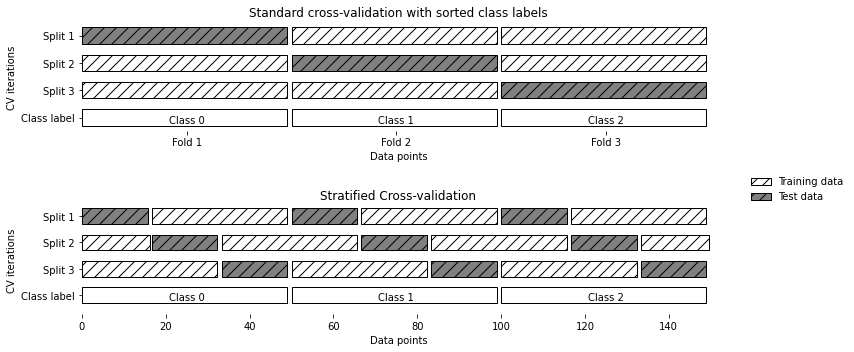

In [ ]:
# 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔
mglearn.plots.plot_stratified_cross_validation()

- 대부분 회귀에서는 k-겹 교차 검증
- 분류에서는 계층별 k-겹 교차 검증의 기본값이 잘 작동

In [ ]:
# cv 매개변수에 교차 검증 분할기 cross-validation splitter를 사용하여 
# 데이터를 분할할 때 세밀하게 제어
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3)
scores = cross_val_score(model_lr, X, y, cv=kfold)
scores

array([0., 0., 0.])

In [ ]:
# 데이터를 분할하기 전에 섞어주면 결과가 향상
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
scores = cross_val_score(model_lr, X, y, cv=kfold)
scores

array([0.98, 0.96, 0.96])

### 임의 분할 교차 검증 (shuffle-split cross-validation)

- 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용
- train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용 가능
- 데이터 부분 샘플링(subsampling)하는 방식은 대규모 데이터셋으로 작업할 때 도움이 됨



[ShuffleSplit()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

```
ShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)
```
- train_size 만큼의 포인트로 훈련 세트를 만들고, test_size만큼의 (훈련 세트와 중첩되지 않은) 포인트로 테스트 세트를 만들도록 분할

- n_splits 횟수만큼 반복

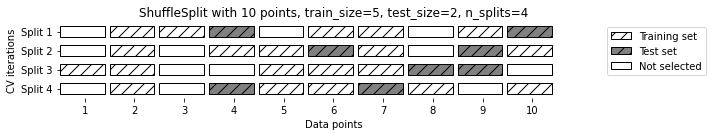

In [ ]:
# 10개의 데이터 포인트에 train_size=0.5, test_size=0.2, n_splits=4를 적용한 ShuffleSplit
mglearn.plots.plot_shuffle_split()

In [ ]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=10, train_size=0.5, test_size=0.2)
scores = cross_val_score(model_lr, X, y, cv=ss)
scores.mean(), scores 

(0.9466666666666667,
 array([0.9       , 0.93333333, 0.93333333, 0.96666667, 0.96666667,
        1.        , 0.93333333, 0.96666667, 0.9       , 0.96666667]))

### 그룹별 교차 검증 (groups cross-validation)

- 데이터 안에 매우 연관된 그룹이 있을 때
- 예: 같은 환자로부터 얻은 여러 샘플을 가지고 새로운 환자에게 일반화하는 의료 애플리케이션

- groups 배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것으로 클래스 레이블과 혼동해서는 안됨

[GroupKFold()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html)

```
GroupKFold(n_splits=5)
```
- n_splits : 폴드 수 (2 이상)


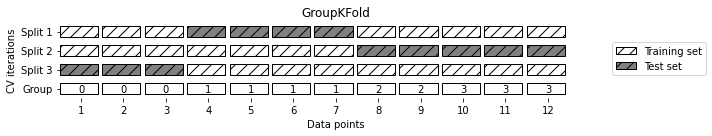

In [ ]:
# 레이블에 기반한 GroupKFold 분할
mglearn.plots.plot_group_kfold()

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs

# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같음
groups = [0,0,0,1,1,1,1,2,2,3,3,3]

gkf = GroupKFold(n_splits=3)
scores = cross_val_score(model_lr, X, y, groups=groups, cv=gkf)
scores.mean(), scores

(0.6722222222222222, array([0.75      , 0.6       , 0.66666667]))

### 반복 교차 검증

- 데이터셋의 크기가 크지 않을 경우 안정된 검증 점수를 얻기 위해 교차 검증을 반복하여 여러 번 수행

- RepeatedKFold : 회귀에 사용
- RepeatedStratifiedKFold : 분류에 사용

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

X = iris.data
y = iris.target
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
scores = cross_val_score(model_lr, X, y, cv=rskfold)
scores.mean(), scores

(0.9640000000000001,
 array([0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.93333333,
        1.        , 0.9       , 0.96666667, 1.        , 1.        ,
        0.93333333, 1.        , 1.        , 0.93333333, 0.96666667,
        1.        , 0.9       , 1.        , 0.9       , 1.        ,
        1.        , 0.93333333, 0.96666667, 0.96666667, 0.93333333,
        0.9       , 1.        , 1.        , 1.        , 0.96666667,
        0.93333333, 0.96666667, 1.        , 0.96666667, 0.93333333,
        1.        , 0.96666667, 0.9       , 0.96666667, 1.        ,
        0.96666667, 1.        , 0.9       , 0.96666667, 0.96666667,
        0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ]))

- 전체 검증 점수는 n_splits * n_repeats 개수만큼 만들어짐

# 그리드 서치 (Grid Search)

- 매개변수을 선택하는 것은 머신러닝에서 중요한 일

- GRID_SEARCH : 관심 있는 매개변수들을 대상으로 가능한 모든 조합 시도하는 것

### 검증 세트

- 매개변수를 조정하기 위해 테스트 세트를 사용하면 모델이 얼마나 좋은지 평가하는 것에 더 이상 사용할 수 없음
- 평가를 위해 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요

- 데이터를 세 개의 세트로 만들어 이 문제를 해결
 - 훈련 세트로는 모델을 작성
 - 검증 (또는 개발) 세트로는 모델의 매개변수를 선택
 - 테스트 세트로는 선택된 매개변수의 성능을 평가

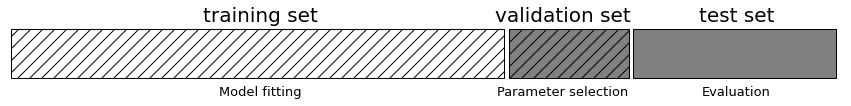

In [ ]:
mglearn.plots.plot_threefold_split()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y,
                                                          random_state=0)
print( X_trainval.shape )

# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval,
                                                      random_state=0)
print( X_train.shape, X_valid.shape )

best_score = 0
# 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대한 SVC 학습
    model = SVC(gamma=gamma, C=C).fit(X_train, y_train)
    # 검증 데이터셋으로 SVC 평가
    score = model.score(X_valid, y_valid)
    # 점수가 더 높으면 매개변수와 함께 기록
    if score > best_score:
      best_score = score
      best_parameters = {'C':C, 'gamma':gamma}

best_score, best_parameters

(112, 4)
(84, 4) (28, 4)


(1.0, {'C': 100, 'gamma': 0.001})

## 교차 검증을 사용한 그리드 서치

In [ ]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듬
best_score = 0
# 그리드 서치
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
  for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # 매개변수의 각 조합에 대한 SVC 학습
    model = SVC(gamma=gamma, C=C)
    # 검증 데이터셋으로 SVC 평가
    score = cross_val_score(model, X_trainval, y_trainval, cv=5).mean()
    # 점수가 더 높으면 매개변수와 함께 기록
    if score > best_score:
      best_score = score
      best_parameters = {'C':C, 'gamma':gamma}

best_score, best_parameters

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

In [ ]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
svm = SVC(**best_parameters).fit(X_trainval, y_trainval)
svm.score(X_test, y_test)

0.9736842105263158

- 5-겹 교차 검증으로 C와 gamma 설정에 대한 SVM 정확도를 평가하려면 36 x 5 = 180 개의 모델이 필요

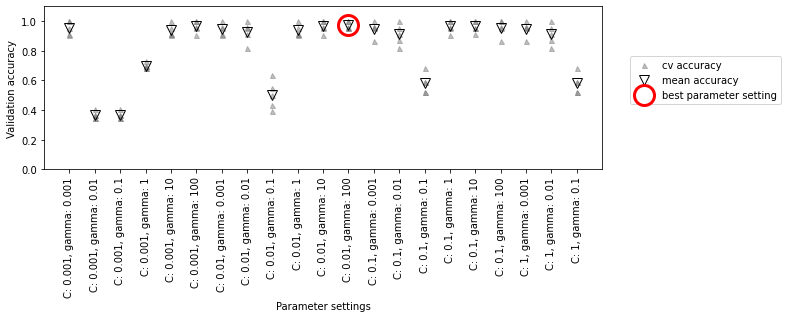

In [ ]:
# 최적의 매개변수를 선택하는 방법
# 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시
mglearn.plots.plot_cross_val_selection()

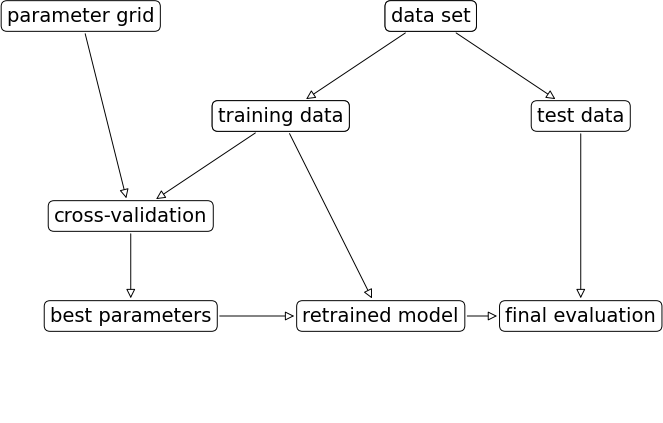

In [ ]:
# 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름
mglearn.plots.plot_grid_search_overview()

## GridSearchCV 메소드를 이용한 그리드서치

In [ ]:
# param_grid
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]}

param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid =param_grid, cv=5, return_train_score=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

- GridSearchCV 객체에 fit() 매서드는 최적의 매개변수를 찾는 일 뿐만 아니라 교차 검증 성능이 가장 좋은 매개변수로 전체 훈련 데이터 세트에 대해 새로운 모델을 자동을 만듬

- GridSearchCV는 전체 데이터로 학습한 모델에 접근할 수 있도록 predict()와 score() 메서드 제공

- GridSearchCV 분류 : StratifiedKFold 회귀 : KFold

- 사용에 따라서는 predict_proba, decision_function도 제공

In [ ]:
grid_search.score(X_test,y_test)

0.9736842105263158

In [ ]:
grid_search.best_score_,grid_search.best_params_

(0.9731225296442687, {'C': 10, 'gamma': 0.1})

- bast_score_ 속성에는 훈련 세트에서 수행한 교차 검증의 평균 정확도가 저장

- 최적 매개 변수에서 전체 훈련 세트를 사용하여 학습한 모델은 best_estimator_

- grid_search 객체가 predict와 score 메서드를 가지고 있으므로 예측이나 모델을 평가하기 위해 best_estimator_ 속성을 사용할 필요가 없음


In [ ]:
grid_search.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 교차 검증 결과 분석

- 교차 검증의 결과를 시각화하면 검색 대상 매개변수가 모델의 일반화에 영향을 얼마나 주는지 이해하는 데 도움이 됨

In [ ]:
import pandas as pd
import numpy as np

results = pd.DataFrame(grid_search.cv_results_)
results.head(5).T

,0,1,2,3,4
mean_fit_time,0.00147514,0.00142169,0.00107136,0.000886965,0.000810194
std_fit_time,9.98148e-05,7.66724e-05,0.000217098,3.56499e-05,2.40505e-05
mean_score_time,0.000704527,0.000641489,0.000425577,0.000364256,0.000393534
std_score_time,8.53215e-05,5.15043e-05,9.01785e-05,1.23605e-05,1.36475e-05
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


### C와 gamma 시각화

 

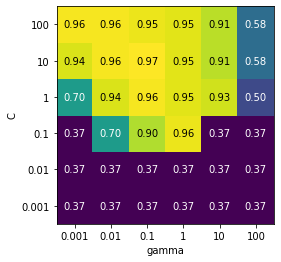

In [ ]:
import mglearn

# 교차 검증 평균 점수 히트맵 그래프

scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C',yticklabels=param_grid['C'])

### 바람직하지 못한 예

- 검색 범위가 적절하게 선택되지 않은 경우

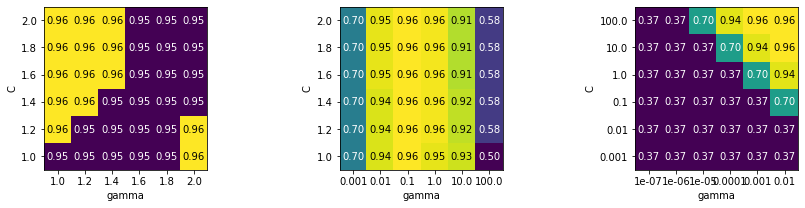

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

pg_linear = {'C': np.linspace(1, 2, 6), 'gamma': np.linspace(1, 2, 6)}
pg_log = {'C': np.linspace(1, 2, 6), 'gamma': np.logspace(-3, 2, 6)}
pg_range = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7, -2, 6)}

for pg, ax in zip([pg_linear, pg_log, pg_range], axes ):
  grid_search = GridSearchCV(SVC(), param_grid=pg, cv=5).fit(X_train, y_train)
  scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
  mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=pg['gamma'],
                      ylabel='C', yticklabels=pg['C'] , ax=ax)

# 모델 평가

분류의 평가 지표

정확도, 오차 행렬, 분류 리포트,
정밀도, 재현율, f1_score, 정밀도-재현율 곡선(ROC), AUC

## 정확도 (Accuracy)

- 실제 데이터에서 에측 데이터가 얼마나 같은지를 판단하는 지표

 > \begin{equation}
\text{정확도(Accuracy)} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
\end{equation}

- 직관적으로 모델 예측 성능을 나타내는 평가 지표

## 오차행렬 (Confusion Matrix)

- 학습된 분류 모델이 예측을 수행하면서 얼마나 혼란스러워(confused) 하고 있는지 함께 보여주는 지표
- 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표


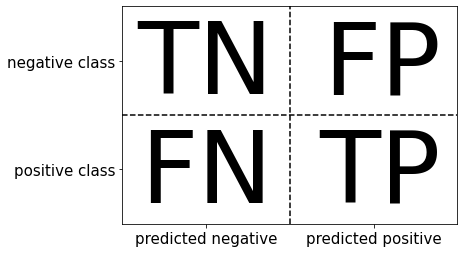

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

- True / False : 예측값과 실제값이 같은가 /틀린가
- Negative / Positive : 예측 결과 값이 부정(0) / 긍정(1)

- TN : 예측값을 Negative 값 0으로 예측했고 실제 값은 역시 Negative 값 0
- FP : 예측값을 Positive 값 1로 예측 했는데 실제 값은 Negative 값 0
- FN : 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1
- TP : 예측값을 Positive 값 1로 예측했는데 실제 값 역시 Positive 값 1

[confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
```
confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
```
- y_true : 정답
- y_pred : 예측 결과

In [ ]:
from sklearn.datasets import load_digits

# 손글씨 데이터
digits = load_digits()
digits.keys()
digits.target_names

# 불균형 데이터셋 생성
y = digits.target == 9
X = digits.data 

X_train, X_test , y_train, y_test = train_test_split(X,y,random_state=0)

In [ ]:
model_lr = LogisticRegression(C=0.1).fit(X_train,y_train)
model_lr.score(X_test,y_test)

0.9844444444444445

In [ ]:
from sklearn.metrics import confusion_matrix

pred_lr = model_lr.predict(X_test)
confusion_matrix(y_test, pred_lr)

array([[402,   1],
       [  6,  41]])

- TN FP
- FN TP


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)
model_dt.score(X_test,y_test)

0.9533333333333334

In [ ]:
pred_tree = model_dt.predict(X_test)
confusion_matrix(y_test, pred_tree)

array([[394,   9],
       [ 12,  35]])

오차 행렬에서 정확도 재정의

> \begin{equation}
\text{Accuracy} = \frac{\text{예측결과가동일한데이터건수}}{\text{전체예측데이터건수}}
= \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

## 정밀도(Precision)와 재현율(Recall)

 > \begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation} <br>
 > \begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

정밀도
 - 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 거짓양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용
 - 양성 예측도(PPV) 라고도 함

재현율
 - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
 - 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용
 - 거짓 음성(FN)을 피하는 것이 중요할 때
 - 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR) 이라고도 함

- 정밀도가 상대적으로 더 중요한 지표인 경우
 - 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 스팸 메일 판단 모델 : 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류하면 메일을 아예 받지 못하게 됨

- 재현율이 상대적으로 더 중요한 지표인 경우
 - 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
 - 암 판단 모델 : 실제 Positive인 암 환자를 Negative 음성으로 잘못 판단했을 경우 생명이 위험
 - 보험/금융 사기 적발 모델 : 실제 사기인 Positive 건을 Negative로 잘못 판단하면 회사에 손해가 큼

## F1 스코어

> \begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

- 정밀도와 재현율을 결합한 지표
- 어느 한 쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 갖음

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, pred_lr), f1_score(y_test,pred_tree)

(0.9213483146067415, 0.7692307692307692)

## 분류 리포트

[classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

- 정밀도, 재현율, f1-스코어 모두를 한 번에 깔끔하게 출력

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr,target_names=['9가 아님','9']) )

              precision    recall  f1-score   support

       9가 아님       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
print(classification_report(y_test,pred_tree,target_names=['9가 아님','9']) )

              precision    recall  f1-score   support

       9가 아님       0.97      0.98      0.97       403
           9       0.80      0.74      0.77        47

    accuracy                           0.95       450
   macro avg       0.88      0.86      0.87       450
weighted avg       0.95      0.95      0.95       450



## ROC, AUC


ROC(Receiver Operating Characteristic) : 여러 임계값에서 분류기의 특성을 분석하는데 널리 사용되는 도구
- ROC 곡선은 분류기의 모든 임계값을 고려하지만 정밀도와 재현율 대신에 거짓 양성 비율 (FPR)이 변할 때 진짜 양성 비율 (TPR)이 어떻게 변하는지를 나타내는 곡선

> \begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

- 진짜 양성비율 : 재현율
- 가짜 양성비율 : 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율

AUC(Area Under the Curve) : ROC 곡선 아래의 면적값



[roc_curve()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) : ROC 곡선을 그리는 메소드

Parameters
- y_true : 실재 클래스 값 array (array shape = [데이터 건수])
- y_score : predict_proba()의 반환 값 array에서 Positive 컬럼의 예측 확뉼이 보통 사용됨. array, shape = [n_samples]

Returns
- fpr : FPR (거짓 양성 비율)
- tpr : TPR (진짜 양성 비율, 재현율, 민감도)
- thresholds : fpr 및 tpr을 계산하는 데 사용되는 결정 함수의 임계값


- [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) : AUC 계산 메소드

decision_function

분류모델 예측의 불확실성을 추정할 수 있는 기능으로 결정함수(decision_function)와 예측확률(predict_proba)이 있습니다. 보통 2가지를 제공하는데 모델에 따라 1가지만 제공하는 경우가 있습니다.

결정함수(decision_function)의 값은 1차원으로 데이터 포인트가 양성 클래인 클래스 1에 속한다고 믿는 정도를 나타냅니다.
양수 값은 양성 클래스를 의미하며 음수 값은 음성 클래스를 의미합니다.

(3375, 2)

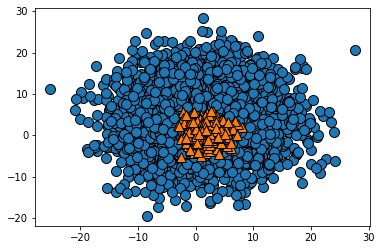

In [ ]:
# 데이터 포인트
X,y = make_blobs(n_samples=(4000,500), random_state=0 , cluster_std=[7.0,2.0])
mglearn.discrete_scatter(X[:,0], X[:,1], y)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
X_train.shape

In [ ]:
model_svc = SVC(gamma=0.5).fit(X_train,y_train)

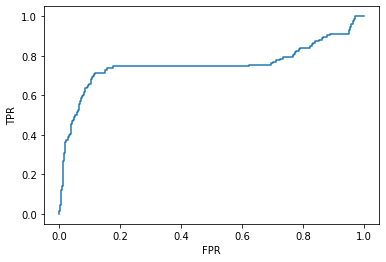

In [ ]:
# ROC 곡선 그리기
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, model_svc.decision_function(X_test))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

- ROC 곡선은 왼쪽 위에 가까울수록 이상적
- 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율이 높은 분류기가 좋은 것

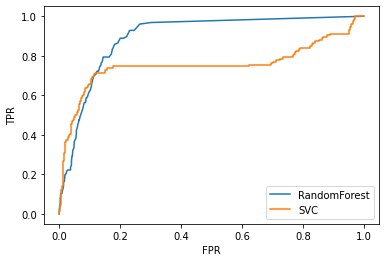

In [ ]:
# 랜덤 포레스트와 SVM의 ROC 곡선 비교
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)

fpr_rf, tpr_rf, th_rf = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='RandomForest')
plt.plot(fpr, tpr, label='SVC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, model_svc.decision_function(X_test))
rf_auc, svc_auc

(0.8956257845146735, 0.7527765861099195)

## 모델평가 실습 01


In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

cancer.target_names 

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 random_state=0)

model_lr = LogisticRegression().fit(X_train,y_train)
model_lr.score(X_train,y_train), model_lr.score(X_test,y_test)

(0.9577464788732394, 0.9300699300699301)

### confusion matrix

- 0,0 진짜 악성, 예측 악성
- 0,1 진짜 악성, 예측 양성
- 1,0 진짜 양성, 예측 악성
- 1,1 진짜 양성, 예측 양성

In [ ]:
from sklearn import metrics
pred_lr = model_lr.predict(X_test)
print(metrics.classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        53
           1       0.93      0.96      0.95        90

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.92       143
weighted avg       0.93      0.93      0.93       143



In [ ]:
metrics.confusion_matrix(y_test,pred_lr)

array([[47,  6],
       [ 4, 86]])

### ROC 곡선 그리기

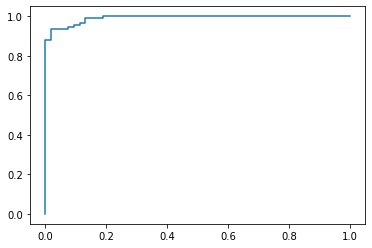

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 결정함수
fpr_lr,tpr_lr,th_kr = roc_curve(y_test,model_lr.decision_function(X_test))
plt.plot(fpr_lr, tpr_lr)

### C값 조정

In [ ]:
from  sklearn.model_selection import GridSearchCV
# GridSearchCV
# param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
# 분류리포트 1의 경우 f1-score 는? 
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, 
                           cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

pred_gs = grid_search.predict(X_test)
print( metrics.classification_report(y_test, pred_gs) )
confusion_matrix(y_test, pred_gs)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



array([[50,  3],
       [ 4, 86]])

### ROC 곡선 비교

(0.9865828092243187, 0.9907756813417191)

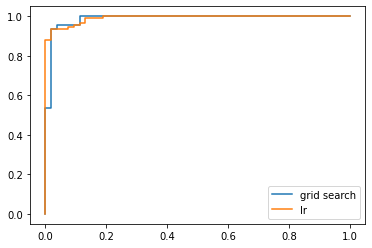

In [ ]:
fpr_gs,tpr_gs, tg_gs = roc_curve(y_test, grid_search.decision_function(X_test))

plt.plot(fpr_gs,tpr_gs, label='grid search')
plt.plot(fpr_lr, tpr_lr, label='lr')
plt.legend()

gs_auc = roc_auc_score(y_test, grid_search.decision_function(X_test))
lr_auc = roc_auc_score(y_test, model_lr.decision_function(X_test))
gs_auc, lr_auc

### scoring을 이용한 ROC 교차검증

- scoring은 성능검증에 사용할 함수이름

In [ ]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='roc_auc',
                           cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

pred_gs = grid_search.predict(X_test)
print( metrics.classification_report(y_test, pred_gs) )
confusion_matrix(y_test, pred_gs)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        53
           1       0.97      0.96      0.96        90

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



array([[50,  3],
       [ 4, 86]])

In [ ]:
from sklearn.model_selection import cross_val_score

C_list = [0.001,0.01,0.1,1,10,100,1000]

for C in C_list:
  m = LogisticRegression(C=C)
  rs = cross_val_score(m, X_train, y_train, cv =5, scoring='roc_auc')
  print(C, ':', rs.mean())

0.001 : 0.9841040694528977
0.01 : 0.9800585677734948
0.1 : 0.9829086218750703
1 : 0.983047045828543
10 : 0.9857399376704764
100 : 0.9823460500214154
1000 : 0.9849335565023332


In [ ]:
for C in C_list:
  m = LogisticRegression(C=C)
  rs = cross_val_score(m, X_train, y_train, cv =5)
  print(C, ':', rs.mean())

0.001 : 0.93890560875513
0.01 : 0.9342270861833105
0.1 : 0.9366073871409029
1 : 0.9366073871409029
10 : 0.9483173734610123
100 : 0.9460191518467852
1000 : 0.9460191518467852


### ROC 곡선 비교

## 회귀의 평가 지표

 > MSE (평균제곱오차) : 실제 값과 예측값의 차이를 제곱해 평균한 것

 > MAE (평균절대값오차) : 실제 값과 예측값의 차이를 절댓값으로 변환해 평균한 것

 > $ \\ R^2 \\ $ : 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음

 > RMSE ( $ \\ \sqrt{ MSE } \\ $ ) : MSE에 루트를 씌워 MSE의 실제 오류 평균보다 더 커지는 특성을 줄임

 > MSLE (Mean Squared Log Error) : MSE에 로그를 적용

 > RMSLE (Root Mean Squared Log Error) : RMSE에 로그를 적용

## 모델평가 실습 02

보스턴 주택 가격

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(boston.data, 
                                                    boston.target, 
                                                    random_state=0)

param_grid= {'alpha': np.logspace(-4, 0, 200) }
model_gr =  GridSearchCV(Ridge(), param_grid=param_grid, 
                      scoring='neg_mean_squared_error',cv= 5)

model_gr.fit(X_train,y_train)
model_gr.best_score_, model_gr.best_params_

(-22.337625164158208, {'alpha': 0.0001})

- 교차검증에서 MSE를 스코어로 사용하고 싶으면  scoring='neg_mean_squared_error' 옵션을 이용

- 사이킷런의 scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환

- 반환된 값에 다시 -1을 곱해야 양의 값이 원래 모델에서 계산된 MSE 값이 됨

- 일반적으로 회귀는 MSE 값이 낮을수록 좋은 회귀 모델 (오차값이 낮을 수록)

In [ ]:
rmse = np.sqrt(-1 * model_gr.best_score_)
rmse

4.726269688047669

# 정리

1. 교차 검증을 해야 한다.
> 데이터를 분리해서 사용. 간단하게 한 번만 분리하는 대신 교차 검증으로 분할을 반복
 - 모델 학습에는 훈련 데이터
 - 모델과 매개변수 선택에는 검증 데이터
 - 모델 평가에는 테스트 데이터
 
 > 훈련 세트와 테스트 세트로 분할하고 모델과 모델 매개변수 선택을 위해 훈련 세트에 교차 검증을 적용


2. 모델 선택과 평가에 사용하는 평가 지표와 방법이 중요하다.
> 모델을 평가하고 선택하기 위한 지표가 이 모델이 실제로 사용되는 상황을 잘 대변해야 함
 - 실전에서는 분류 문제에 균형 잡힌 클래스를 가진 경우가 거의 없음
 - 거짓 양성(FP)과 거짓 음성(FN)이 매우 큰 영향을 미침